In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import torch
import torch.nn as nn

<AxesSubplot:xlabel='wt', ylabel='mpg'>

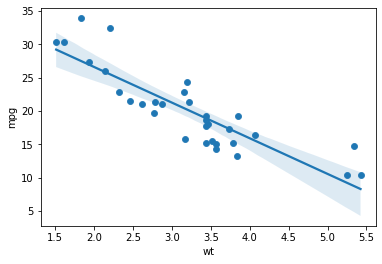

In [32]:
cars_file = 'https://gist.githubusercontent.com/noamross/e5d3e859aa0c794be10b/raw/b999fb4425b54c63cab088c0ce2c0d6ce961a563/cars.csv'
cars = pd.read_csv(cars_file)

sns.scatterplot(x='wt', y='mpg', data=cars)
sns.regplot(x='wt', y='mpg', data=cars)

In [33]:
cars.head()

,Unnamed: 0,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [34]:
x_list = cars.wt.values
x_list = np.array(x_list,dtype=np.float32).reshape(-1,1)
x_list

array([[2.62 ],
       [2.875],
       [2.32 ],
       [3.215],
       [3.44 ],
       [3.46 ],
       [3.57 ],
       [3.19 ],
       [3.15 ],
       [3.44 ],
       [3.44 ],
       [4.07 ],
       [3.73 ],
       [3.78 ],
       [5.25 ],
       [5.424],
       [5.345],
       [2.2  ],
       [1.615],
       [1.835],
       [2.465],
       [3.52 ],
       [3.435],
       [3.84 ],
       [3.845],
       [1.935],
       [2.14 ],
       [1.513],
       [3.17 ],
       [2.77 ],
       [3.57 ],
       [2.78 ]], dtype=float32)

In [35]:
y_list = cars.mpg.values
y_list = np.array(y_list,dtype=np.float32)
y_list

array([21. , 21. , 22.8, 21.4, 18.7, 18.1, 14.3, 24.4, 22.8, 19.2, 17.8,
       16.4, 17.3, 15.2, 10.4, 10.4, 14.7, 32.4, 30.4, 33.9, 21.5, 15.5,
       15.2, 13.3, 19.2, 27.3, 26. , 30.4, 15.8, 19.7, 15. , 21.4],
      dtype=float32)

In [36]:
X = torch.from_numpy(x_list)
Y = torch.tensor(y_list)
X,Y

(tensor([[2.6200],
         [2.8750],
         [2.3200],
         [3.2150],
         [3.4400],
         [3.4600],
         [3.5700],
         [3.1900],
         [3.1500],
         [3.4400],
         [3.4400],
         [4.0700],
         [3.7300],
         [3.7800],
         [5.2500],
         [5.4240],
         [5.3450],
         [2.2000],
         [1.6150],
         [1.8350],
         [2.4650],
         [3.5200],
         [3.4350],
         [3.8400],
         [3.8450],
         [1.9350],
         [2.1400],
         [1.5130],
         [3.1700],
         [2.7700],
         [3.5700],
         [2.7800]]),
 tensor([21.0000, 21.0000, 22.8000, 21.4000, 18.7000, 18.1000, 14.3000, 24.4000,
         22.8000, 19.2000, 17.8000, 16.4000, 17.3000, 15.2000, 10.4000, 10.4000,
         14.7000, 32.4000, 30.4000, 33.9000, 21.5000, 15.5000, 15.2000, 13.3000,
         19.2000, 27.3000, 26.0000, 30.4000, 15.8000, 19.7000, 15.0000, 21.4000]))

In [37]:
w = torch.rand(1,requires_grad=True,dtype=torch.float32)
b = torch.rand(1,requires_grad=True,dtype=torch.float32)

num_epochs=1000
lr = 1e-03

for epoch in range(num_epochs):
    for i in range(len(X)):
        # forward pass
        y_pred = w*X[i] + b

        # loss calc
        loss = (y_pred-Y[i])**2

        # Gradient Calc
        loss.backward()

        #extract losses
        loss_val = loss.data[0]

        # update weights and biases
        with torch.no_grad():
            w -= w.grad*lr
            b -= b.grad*lr
            w.grad.zero_()
            b.grad.zero_()
    
    if((epoch+1)%100==0):
        print(f'epoch: {epoch+1} , loss: {loss_val}')
        

epoch: 100 , loss: 11.788858413696289
epoch: 200 , loss: 3.0256214141845703
epoch: 300 , loss: 0.4930124282836914
epoch: 400 , loss: 0.004491736181080341
epoch: 500 , loss: 0.10359344631433487
epoch: 600 , loss: 0.3135908544063568
epoch: 700 , loss: 0.49815505743026733
epoch: 800 , loss: 0.6321160793304443
epoch: 900 , loss: 0.7220500111579895
epoch: 1000 , loss: 0.7800619006156921


In [41]:
y_list

array([21. , 21. , 22.8, 21.4, 18.7, 18.1, 14.3, 24.4, 22.8, 19.2, 17.8,
       16.4, 17.3, 15.2, 10.4, 10.4, 14.7, 32.4, 30.4, 33.9, 21.5, 15.5,
       15.2, 13.3, 19.2, 27.3, 26. , 30.4, 15.8, 19.7, 15. , 21.4],
      dtype=float32)

weights: tensor([-5.2296]), bias: tensor([36.8061])
[23.10453  21.77098  24.673416 19.992912 18.81625  18.711657 18.1364
 20.123652 20.332836 18.81625  18.81625  15.521593 17.299662 17.038181
  9.350653  8.440701  8.85384  25.300968 28.36029  27.209776 23.915121
 18.39788  18.842398 16.724405 16.698256 26.686815 25.614744 28.893711
 20.228245 22.32009  18.1364   22.267794]


<AxesSubplot:>

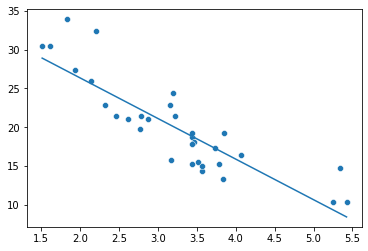

In [49]:
print(f'weights: {w.data}, bias: {b.data}')

y_pred = (w*X + b).detach().numpy()
print(y_pred.reshape(-1))
sns.scatterplot(x = x_list.reshape(-1),y = y_list)
sns.lineplot(x =x_list.reshape(-1),y = y_pred.reshape(-1))

In [50]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(x_list,y_list)
print(f'slope: {reg.coef_} intercept: {reg.intercept_}')

slope: [-5.3444715] intercept: 37.285125732421875


In [ ]:
from torchviz import make_dot
import os
os.environ['PATH'] += os.pathsep+"C:/Program Files (x86)/Graphviz/bin"
make_dot(loss)